# National Health and Nutrition Examination Survey
2007 until March 2020 | Demographic Variables + Dietary Variables + Mental Health Variables

# Notebook for all Functions for Data Analysis

Libaries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# Correlation Matrix and Logistic Regression

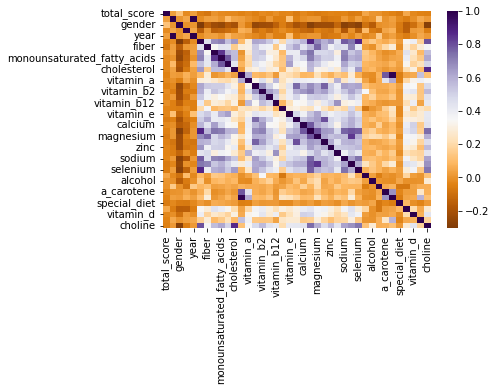

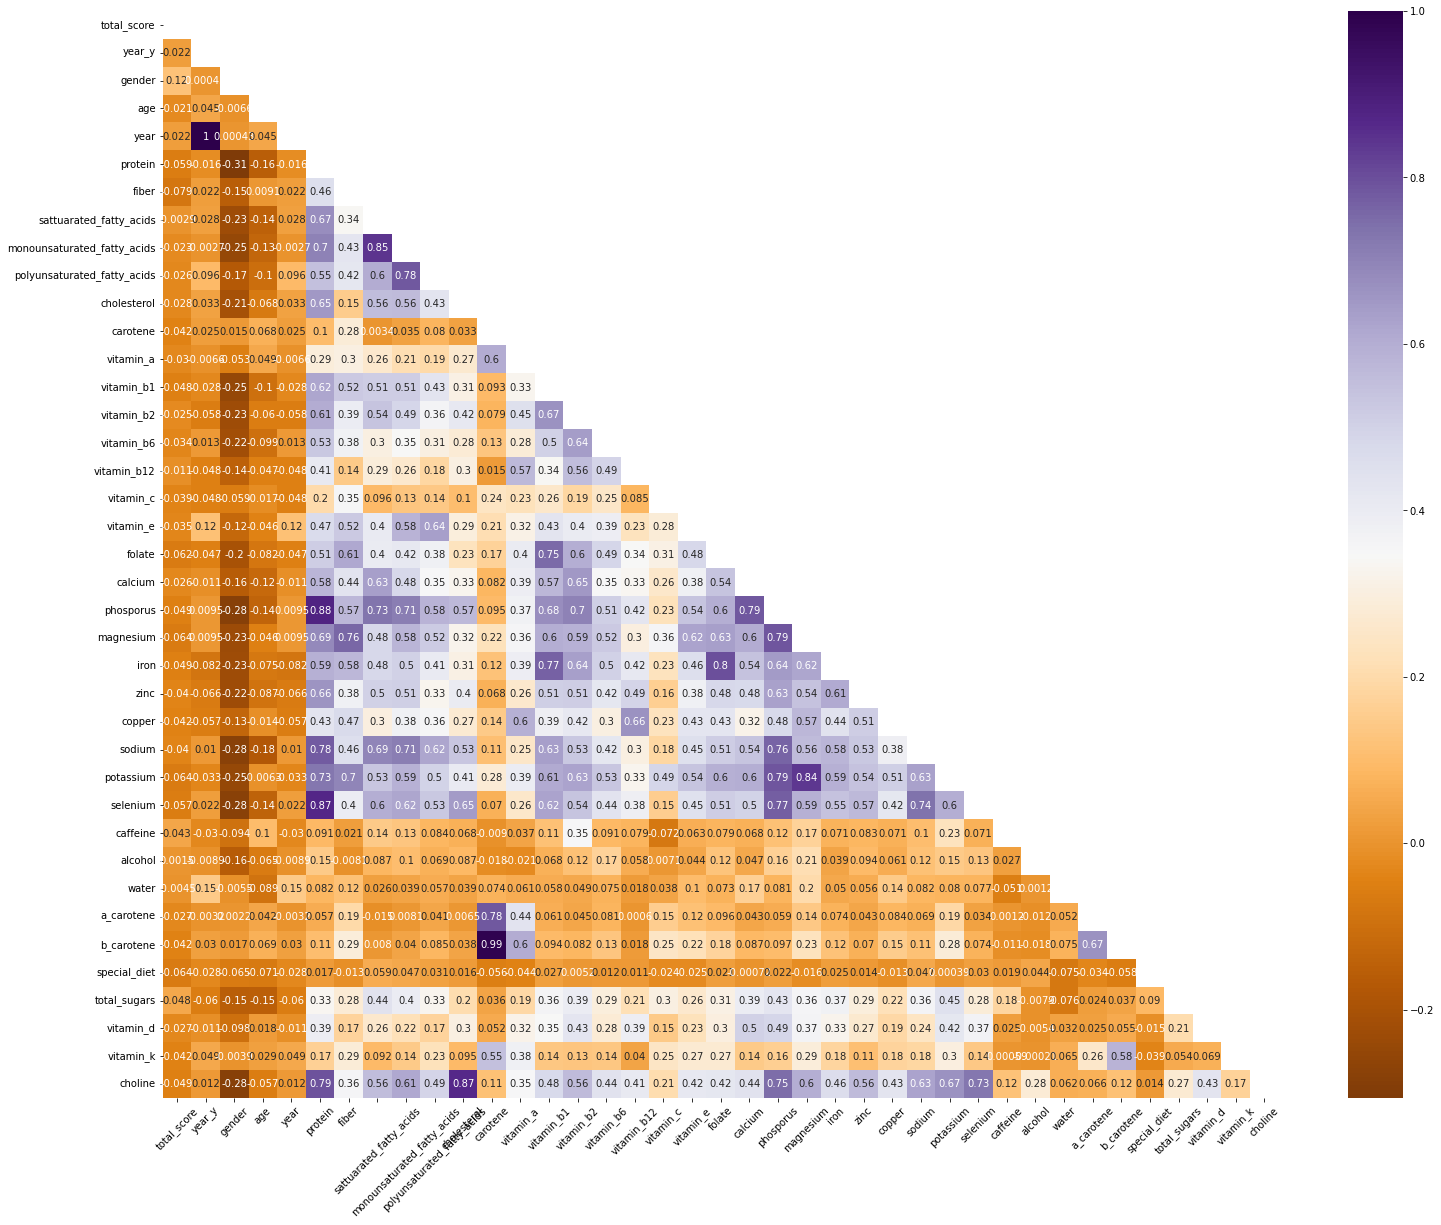

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            total_score   R-squared (uncentered):                   0.374
Model:                            OLS   Adj. R-squared (uncentered):              0.373
Method:                 Least Squares   F-statistic:                              601.6
Date:                Fri, 22 Dec 2023   Prob (F-statistic):                        0.00
Time:                        11:41:59   Log-Likelihood:                         -95562.
No. Observations:               33258   AIC:                                  1.912e+05
Df Residuals:                   33225   BIC:                                  1.915e+05
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
gender                          1.7132      0.045     37.783      0.000       1.624       1.802
age                             0.0232      0.001     24.254      0.000       0.021       0.025
protein                         0.0007      0.002      0.353      0.724      -0.003       0.004
fiber                          -0.0190      0.004     -4.305      0.000      -0.028      -0.010
sattuarated_fatty_acids         0.0065      0.003      1.874      0.061      -0.000       0.013
monounsaturated_fatty_acids     0.0034      0.004      0.912      0.362      -0.004       0.011
polyunsaturated_fatty_acids    -0.0047      0.003     -1.390      0.165      -0.011       0.002
cholesterol                    -0.0003      0.000     -0.995      0.320      -0.001       0.000
carotene                    -1.335e-05   8.76e-06     -1.524      0.128   -3.05e-05    3.82e-06
vitamin_a                    1.058e-05   8.76e-05      0.121      0.904      -0.000       0.000
vitamin_b1                      0.0803      0.051      1.579      0.114      -0.019       0.180
vitamin_b2                     -0.1117      0.038     -2.913      0.004      -0.187      -0.037
vitamin_b6                      0.0520      0.023      2.261      0.024       0.007       0.097
vitamin_b12                     0.0169      0.008      2.101      0.036       0.001       0.033
vitamin_c                      -0.0003      0.000     -1.009      0.313      -0.001       0.000
vitamin_e                       0.0049      0.006      0.874      0.382      -0.006       0.016
folate                         -0.0004      0.000     -2.121      0.034      -0.001   -3.07e-05
calcium                      5.235e-05   9.05e-05      0.578      0.563      -0.000       0.000
phosporus                       0.0002      0.000      1.364      0.173   -8.11e-05       0.000
magnesium                    1.704e-05      0.000      0.038      0.970      -0.001       0.001
iron                            0.0117      0.006      2.036      0.042       0.000       0.023
zinc                           -0.0051      0.005     -1.012      0.311      -0.015       0.005
copper                         -0.0792      0.051     -1.564      0.118      -0.179       0.020
sodium                          0.0001   2.52e-05      4.166      0.000    5.57e-05       0.000
potassium                      -0.0002   5.08e-05     -3.911      0.000      -0.000   -9.92e-05
selenium                       -0.0007      0.001     -0.788      0.431      -0.002       0.001
caffeine                        0.0013      0.000      8.960      0.000       0.001       0.002
alcohol                         0.0064      0.001      6.270      0.000       0.004       0.008
water   

In [3]:
def data_analysis(file_path):
    df = pd.read_csv(file_path)

    # Select numerical data of all relevant columns
    df_num = df.iloc[:, 11:]
    df_num = df_num.select_dtypes(include=[np.number])

    # Compute correlation
    df_corr = df_num.corr()

    # Generate heatmap
    sns.heatmap(df_corr, annot=False, cmap="PuOr")
    plt.show()
    mask = np.zeros_like(df_corr)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(25, 20))
    ax = sns.heatmap(df_corr, mask=mask, annot=True, cmap="PuOr")
    plt.xticks(rotation=45)
    plt.show()

    # Prepare the df for linear regression
    df_model = df_num.dropna()
    df_model = df_model.drop(['year_y', 'year', 'special_diet', 'a_carotene', 'b_carotene'], axis=1)

    X = df_model.drop('total_score', axis=1)
    Y = df_model['total_score']

    # Fit the model
    model = sm.OLS(Y, X).fit()
    return model.summary()

# Example usage:
summary = data_analysis(r"C:\Users\ljant\Desktop\Ironhack\Projects\Project_2\Clean_datafiles\clean_data.csv")
summary

# Statistical Hypothesis Testing

In [10]:
def hypothesis_testing(file_path, variables):
    df = pd.read_csv(file_path)
    df = df.dropna()

    # Categorising depression levels
    bins = [-1, 9, 27]
    labels = ['not_depressed', 'depressed']
    df['depression_level'] = pd.cut(df['total_score'], bins=bins, labels=labels)

    # Split the dataset
    depressed = df[df['depression_level'] == 'depressed']
    not_depressed = df[df['depression_level'] == 'not_depressed']

    # Perform Mann-Whitney U tests
    results = {}
    for variable in variables:
        u_stat, p_val = stats.mannwhitneyu(not_depressed[variable], depressed[variable], alternative='two-sided')
        results[variable] = {'u_stat': u_stat, 'p_val': p_val}

    df_results = pd.DataFrame(results).T

    # Check for significance
    alpha = 0.05
    df_results['significant'] = df_results['p_val'] < alpha

    return df, df_results

variables = ['age', 'gender', 'protein', 'fiber', 'sattuarated_fatty_acids', 
             'monounsaturated_fatty_acids', 'polyunsaturated_fatty_acids', 
             'cholesterol', 'carotene', 'vitamin_a', 'vitamin_b1', 'vitamin_b2', 
             'vitamin_b6', 'vitamin_b12', 'vitamin_c', 'vitamin_e', 'folate', 
             'calcium', 'phosporus', 'magnesium', 'iron', 'zinc', 'copper', 
             'sodium', 'potassium', 'selenium', 'caffeine', 'alcohol', 'water', 
             'total_sugars', 'vitamin_d', 'vitamin_k', 'choline']

df, df_results = hypothesis_testing(r"C:\Users\ljant\Desktop\Ironhack\Projects\Project_2\Clean_datafiles\clean_data.csv", variables)
df
df_results

,u_stat,p_val,significant
age,46052810.5,4.341016e-01,False
gender,39019518.0,1.885223e-52,True
protein,52068087.5,3.601685e-37,True
fiber,52609457.5,2.072733e-43,True
sattuarated_fatty_acids,47901724.0,8.305284e-06,True
monounsaturated_fatty_acids,49365988.5,1.735803e-13,True
polyunsaturated_fatty_acids,50026025.5,3.968700e-18,True
cholesterol,49384666.0,1.312958e-13,True
carotene,52259423.0,2.560788e-39,True
vitamin_a,50621061.5,6.054999e-23,True
